In [1]:
# Import libraries
import numpy as np
import collections
import datetime as dt
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import sklearn.linear_model as sk
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline

/Users/JohnBowers/anaconda/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [2]:
# Load cleaned data from Dropbox
df = pd.read_csv('https://www.dropbox.com/s/80ya9insucxch7e/cleaned_data.csv?dl=1', index_col=0) 
# print some data to examine
df.head(n=5)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


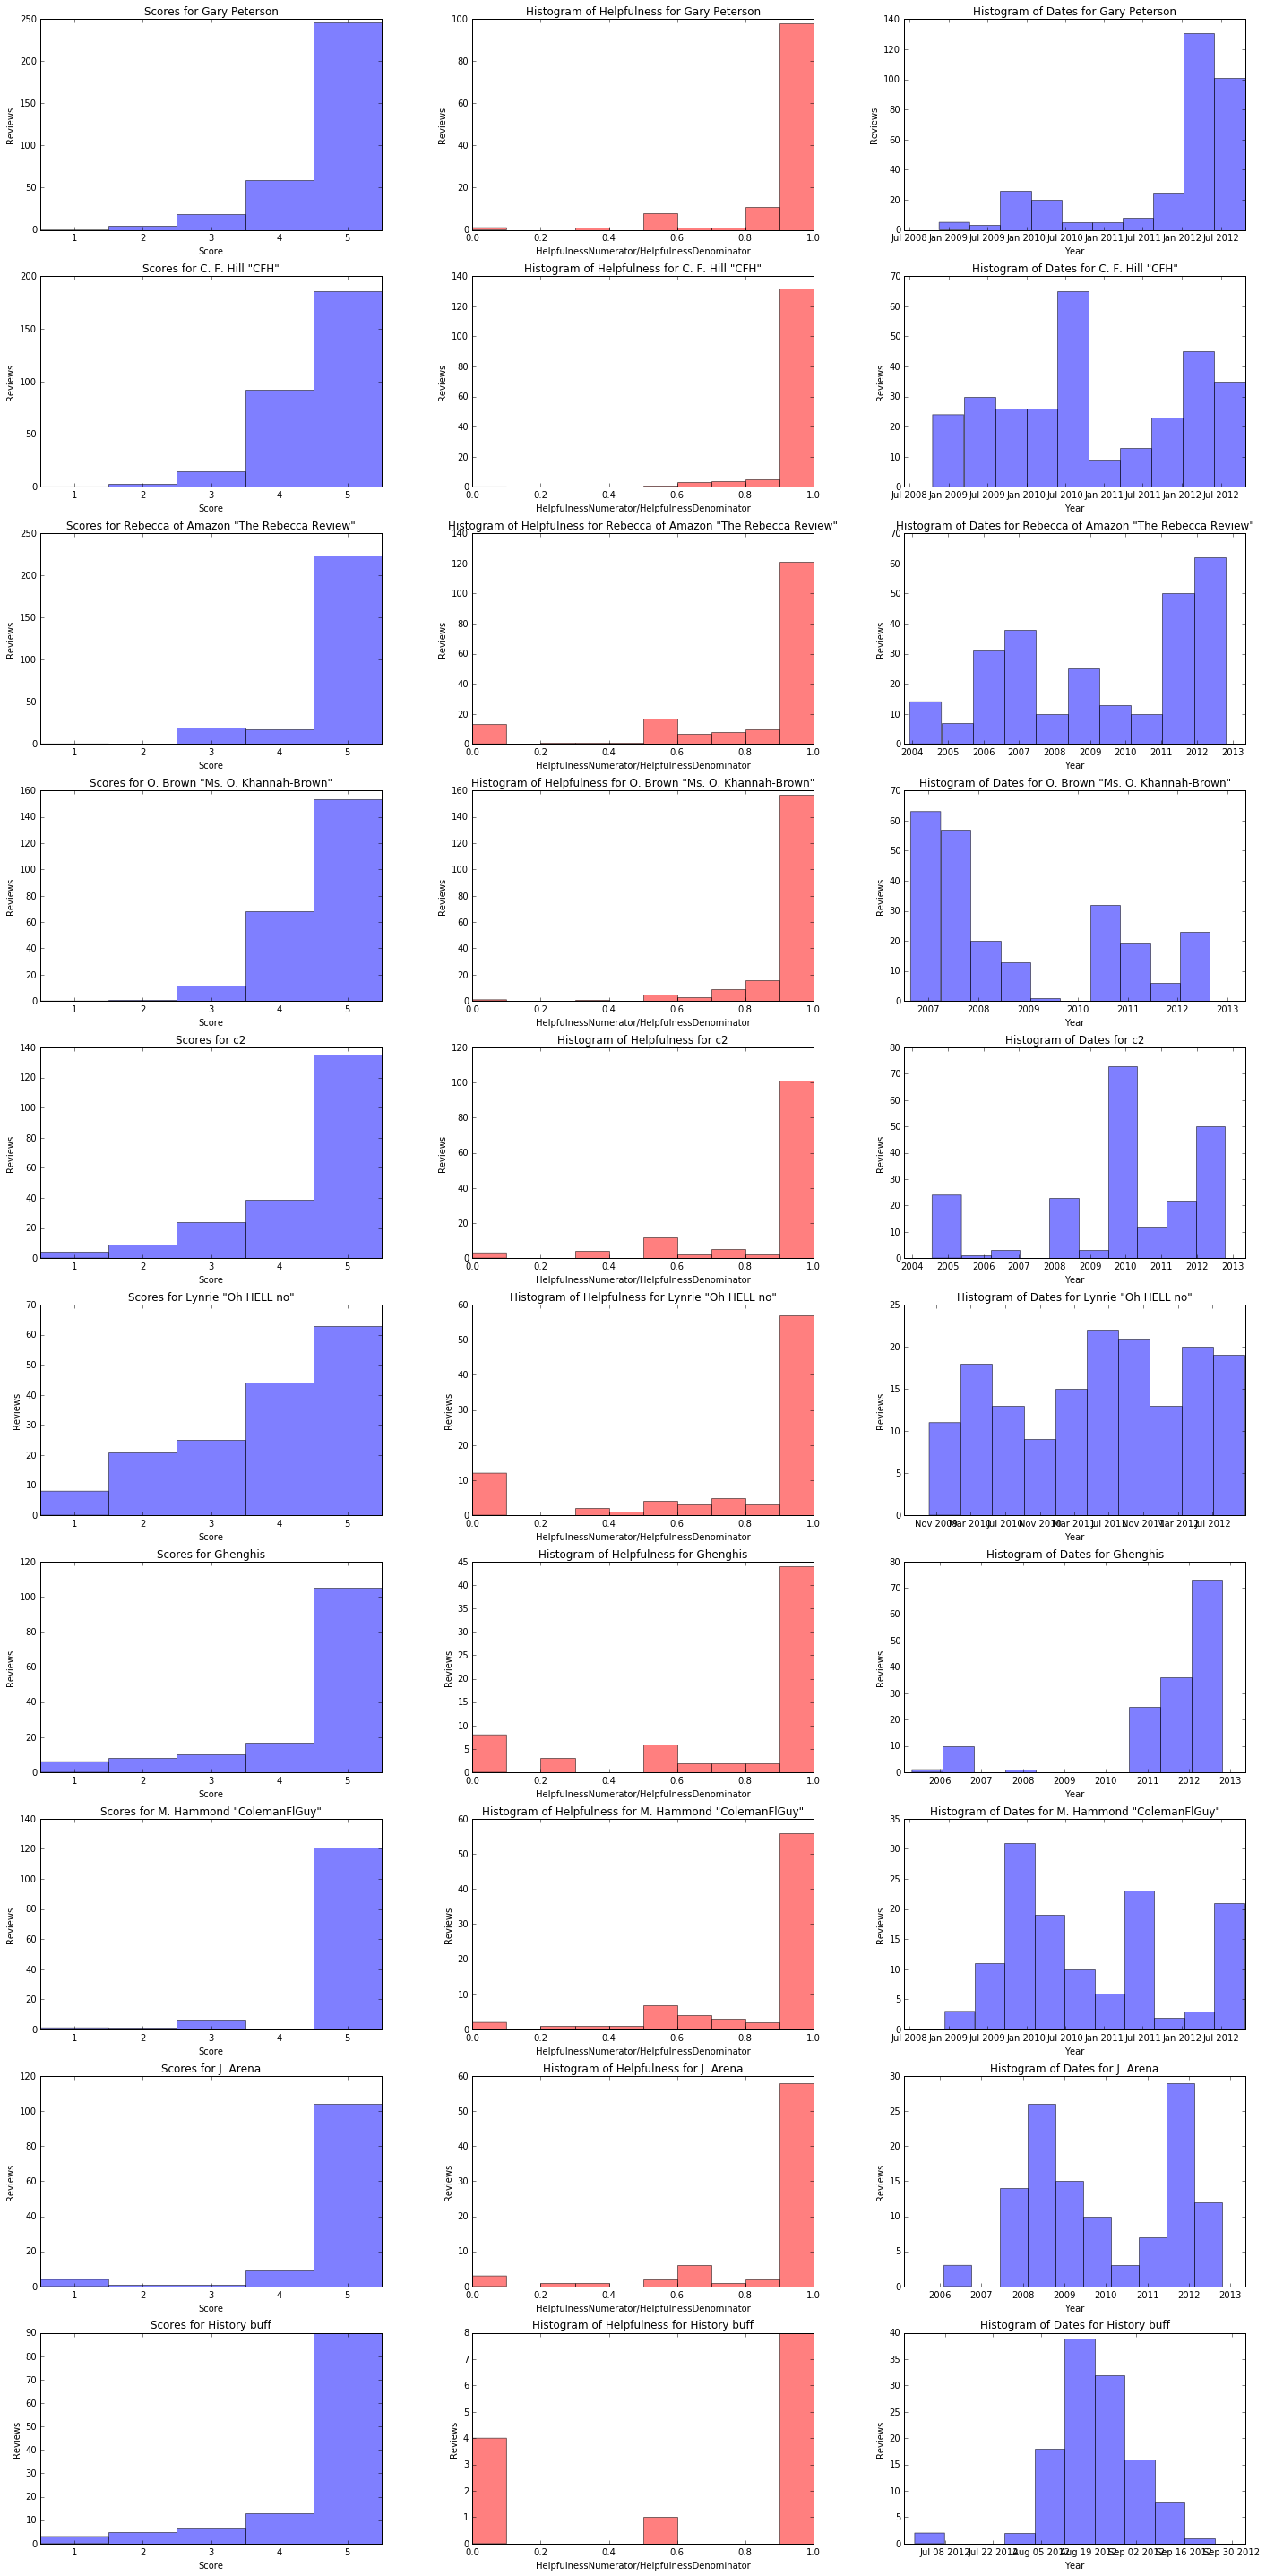

In [50]:
#score distributions for top 10 reviewers
fig, ax = plt.subplots(10, 3, figsize=(20, 40))

top_10 = df['UserId'].value_counts()[:10].keys().values
rows = iter(range(10))

for user in top_10:
    reviews = df[df['UserId'] == user]
    row = rows.next()
    ax[row,0].hist(reviews['Score'], bins=[1,2,3,4,5,6], color='b', alpha=0.5, align='left')
    ax[row,0].set_title("Scores for {}".format(reviews['ProfileName'].values[0]))
    ax[row,0].set_xlabel("Score")
    ax[row,0].set_ylabel("Reviews")
    ax[row,0].set_xlim(.5,5.5)
    
    helpfulness = []
    for index, i in reviews.iterrows():
        if i['HelpfulnessDenominator'] != 0:
            helpfulness.append(float(i['HelpfulnessNumerator'])/i['HelpfulnessDenominator'])
    
    ax[row,1].hist(helpfulness, color='r', alpha=0.5, range=[0,1])
    ax[row,1].set_title("Histogram of Helpfulness for {}".format(reviews['ProfileName'].values[0]))
    ax[row,1].set_xlabel("HelpfulnessNumerator/HelpfulnessDenominator")
    ax[row,1].set_ylabel("Reviews")
    
    mpl_data = matplotlib.dates.epoch2num(reviews['Time'])

    ax[row,2].hist(mpl_data, color='b', alpha=0.5)
    locator = matplotlib.dates.AutoDateLocator()
    ax[row,2].xaxis.set_major_locator(locator)
    ax[row,2].xaxis.set_major_formatter(matplotlib.dates.AutoDateFormatter(locator))
    ax[row,2].set_title("Histogram of Dates for {}".format(reviews['ProfileName'].values[0]))
    ax[row,2].set_xlabel("Year")
    ax[row,2].set_ylabel("Reviews")

plt.tight_layout()